# Schedule as a cumulative bar chart

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import datetime

In [89]:
def plot_hours_per_day(df):
    hours_per_day = df.sum()
    
    
    x_day = (pd.to_datetime(hours_per_day.index[1:])).to_list()
    y_hours_per_day = (hours_per_day.array[1:]).tolist()

    # x_day = range(282)
    # y_hours_per_day = 3


    fig, ax = plt.subplots()
    ax.set_ylabel('Hours')
    ax.set_title('Hours per day')
    ax.yaxis.set_major_locator(tck.MultipleLocator(1))
    #ax.xaxis.set_major_locator(tck.MaxNLocator(5, integer=True, steps=[1, 2, 4, 5, 10]))
    # ax.xaxis.set_major_locator(tck.MaxNLocator(5))
    ax.step(x_day, y_hours_per_day, color='tab:green')
    ax.fill_between(x_day, 0, y_hours_per_day, hatch='/', alpha=0.2, color='#90EE90')
    ax.yaxis.grid(alpha=0.5)
    ax.set_axisbelow(True)
    # ax.set_ylim(bottom=0, top=get_HOURS_PER_DAY() + 0.5)
    ax.set_ylim(bottom=0)
    ax.set_xlim([x_day[0], x_day[-1]])
    ax.tick_params(axis='x', labelsize='small')
    # plt.close()

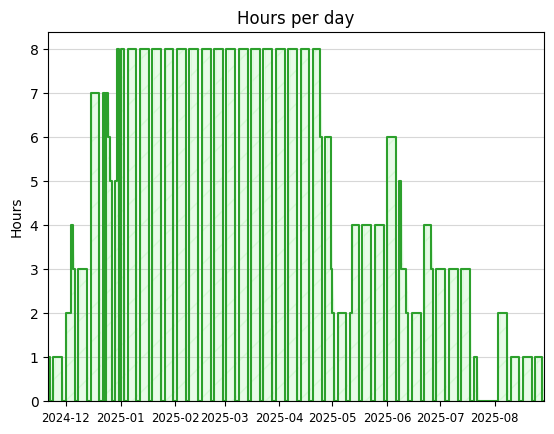

In [90]:
df = pd.read_csv("./input/schedule_a.csv")
# df
plot_hours_per_day(df)



# y_hours_per_day = (hours_per_day.array[1:]).tolist()
# y_hours_per_day

# x_day = pd.to_datetime(hours_per_day.index[1:]).to_list()
# x_day

# w = y_hours_per_day.astype(int)
